In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cv2
%matplotlib inline

In [3]:
from skimage.io import imread, imshow
import cv2
%matplotlib inline

In [4]:
import plotly.offline as py

In [5]:
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [6]:
from subprocess import check_output
print(check_output(['ls', './data/train']).decode('utf8'))

Type_1
Type_2
Type_3



In [7]:
from glob import glob
basepath = './data/train/'

all_cervix_images = []

for path in sorted(glob(basepath + '*')):
    cervix_type = path.split('/')[-1]
    cervix_images = sorted(glob(basepath + cervix_type + '/*'))
    all_cervix_images = all_cervix_images + cervix_images

all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

,imagepath,filetype,type
0,./data/train/Type_1/0.jpg,jpg,Type_1
1,./data/train/Type_1/10.jpg,jpg,Type_1
2,./data/train/Type_1/1013.jpg,jpg,Type_1
3,./data/train/Type_1/1014.jpg,jpg,Type_1
4,./data/train/Type_1/1019.jpg,jpg,Type_1


In [8]:
print("We have a total of {} images in the whole dataset".format(all_cervix_images.shape[0]))
type_aggregation = all_cervix_images.groupby(['type', 'filetype']).agg('count')

We have a total of 1481 images in the whole dataset


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



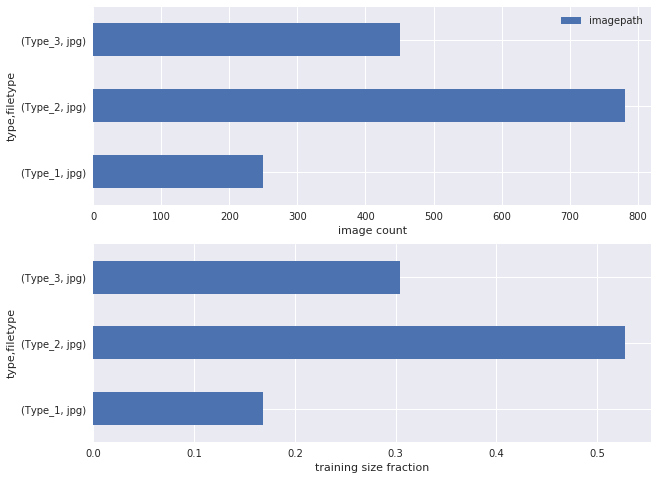

In [9]:
type_aggregation_p = type_aggregation.apply(lambda row: 1.0*row['imagepath']/all_cervix_images.shape[0], axis=1)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel('training size fraction')



./data/train/Type_1/0.jpg
./data/train/Type_2/1.jpg


/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.

./data/train/Type_3/1000.jpg


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



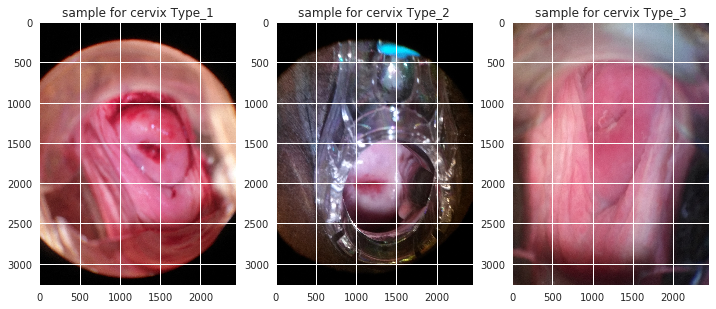

In [17]:
fig = plt.figure(figsize=(12, 8))

i = 1
for t in all_cervix_images['type'].unique():
    ax = fig.add_subplot(1, 3, i)
    i += 1
    f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
    plt.imshow(plt.imread(f))
    print(f)
    plt.title('sample for cervix {}'.format(t))